#### Importowanie bibliotek

In [26]:
import pandas as pd
import numpy as np
from scipy.cluster import hierarchy
import seaborn as sns

import matplotlib.pyplot as plt

sns.set_style("darkgrid")

#### Wczytanie zbioru danych

In [27]:
df = pd.read_csv("Metabolomics_Final_clean_filtered.csv")

In [28]:
df.head()

,Name,Group,Metabolite1,Metabolite2,Metabolite3,Metabolite4,Metabolite5,Metabolite6,Metabolite7,Metabolite8,...,Metabolite490,Metabolite491,Metabolite492,Metabolite493,Metabolite494,Metabolite495,Metabolite496,Metabolite497,Metabolite498,Metabolite499
0,Blank1,Blank,2158720176,1323601373,1155863033,16644281,320204738,220643120,544708319,391087507,...,3768406,2372300,2358477,2358477,2637942,10818916,19983998,2516708,13684089,43203415
1,Blank2,Blank,2754242436,1029907170,920044034,22259900,383302329,174700720,489531412,404771433,...,2400495,2963796,6962996,2166142,3089427,5346311,18223851,330115,14733193,42289842
2,Blank3,Blank,2606203607,969272301,1046053330,34510948,324586644,206281608,454280170,380364674,...,2936569,3193138,8081682,8081682,6784158,10380240,15574330,2549386,10950084,35767880
3,Blank4,Blank,2357783774,846664923,994255413,18101609,235174380,192156766,412162752,319787456,...,2889992,3502928,3401721,3401721,5794121,7671547,17209753,495304,14516164,34853873
4,Blank5,Blank,2516962706,1023976667,865106003,20440121,244448832,173176446,391070564,337456134,...,2764587,2218162,4197121,802358,5154544,560186,16645461,1466120,12433815,27485847


#### Usunięcie blanków i QC

In [29]:
# Filter out Blank and QC samples
df = df[~df['Group'].isin(['Blank', 'QC'])]

In [30]:
df.shape

(81, 501)

#### Standaryzacja danych

In [31]:
from sklearn.preprocessing import StandardScaler

# Get numeric columns (excluding 'Name' and 'Group')
numeric_columns = df.drop(['Name', 'Group'], axis=1).columns

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the numeric columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Verify standardization
print("Mean of standardized features:")
print(df[numeric_columns].mean().mean())
print("\nStandard deviation of standardized features:")
print(df[numeric_columns].std().mean())

Mean of standardized features:
8.785398653373771e-18

Standard deviation of standardized features:
1.006230589874905


#### Analiza HCA

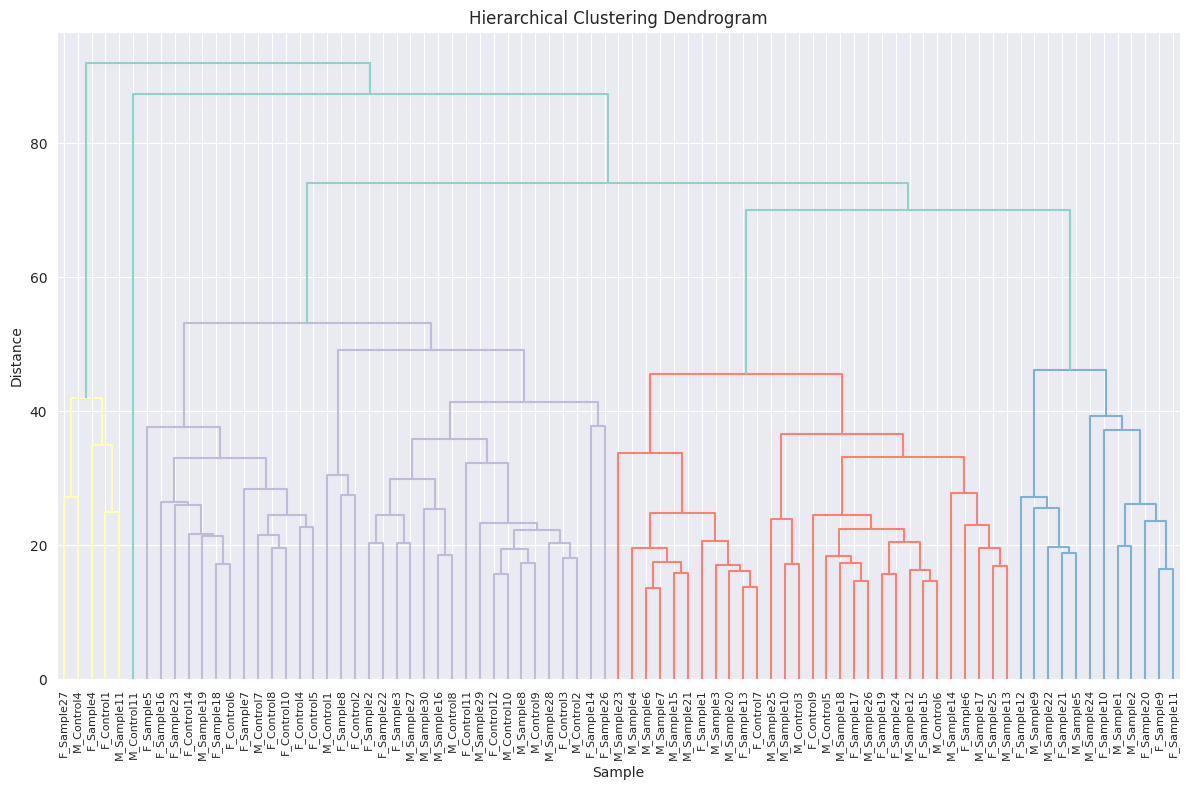

In [32]:
# Prepare data for clustering (exclude non-numeric columns)
data_for_clustering = df.select_dtypes(include=['float64'])

# Compute the linkage matrix
linkage_matrix = hierarchy.linkage(data_for_clustering, method='ward', metric='euclidean')

# Create figure with larger size
plt.figure(figsize=(12, 8))

# Create dendrogram
dendrogram = hierarchy.dendrogram(linkage_matrix, 
                                leaf_rotation=90,
                                leaf_font_size=8,
                                labels=df['Name'].values)

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample')
plt.ylabel('Distance')

# Adjust layout to prevent label cutoff
plt.tight_layout()

#### Odcięcie drzewa na 0.7 wysokości

/tmp/ipykernel_83839/1442229025.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Cluster'] = clusters


Number of clusters formed: 5


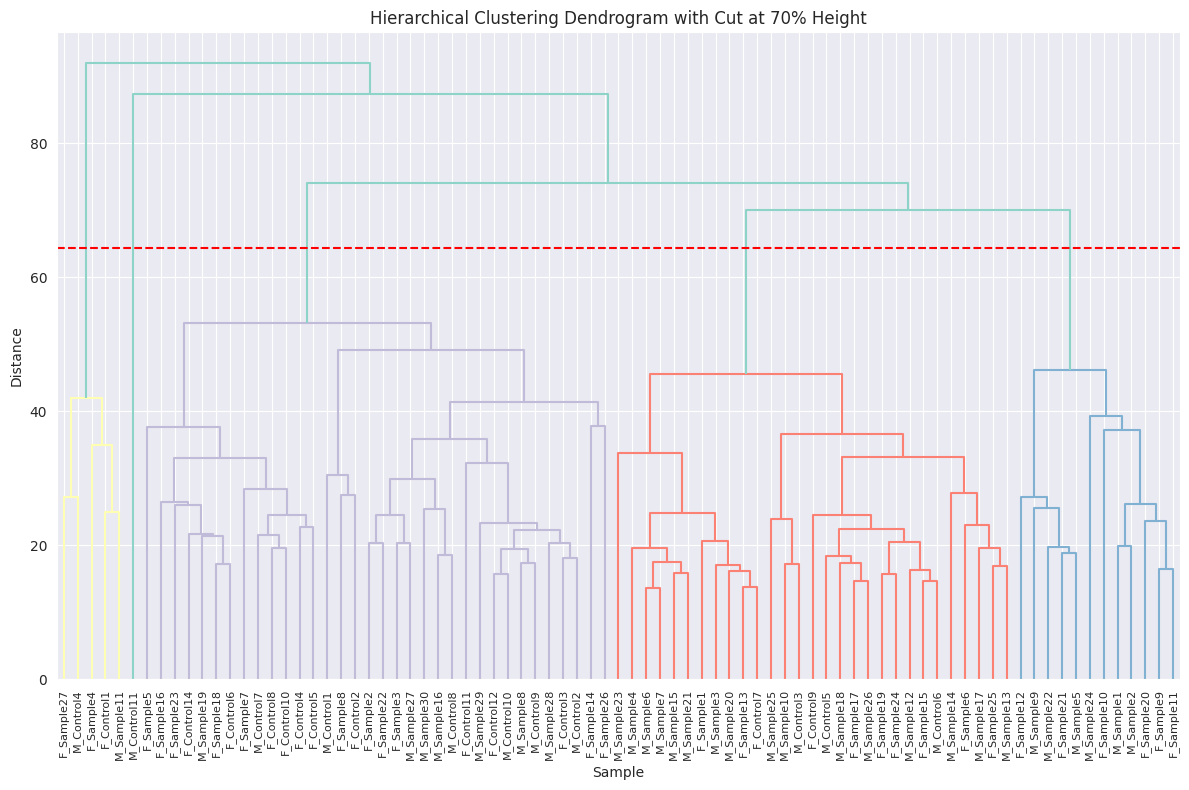

In [33]:
# Get the maximum height from the linkage matrix
max_height = linkage_matrix[-1, 2]  # Last merge height
cut_height = 0.7 * max_height

# Cut the tree at 0.7 of max height
clusters = hierarchy.cut_tree(linkage_matrix, height=cut_height)

# Add cluster labels to the dataframe
df['Cluster'] = clusters

# Plot the dendrogram with the cut line
plt.figure(figsize=(12, 8))
dendrogram = hierarchy.dendrogram(linkage_matrix,
                                leaf_rotation=90,
                                leaf_font_size=8,
                                labels=df['Name'].values)

# Add horizontal line at cut height
plt.axhline(y=cut_height, color='r', linestyle='--')

plt.title('Hierarchical Clustering Dendrogram with Cut at 70% Height')
plt.xlabel('Sample')
plt.ylabel('Distance')
plt.tight_layout()

# Print number of clusters formed
n_clusters = len(np.unique(clusters))
print(f"Number of clusters formed: {n_clusters}")

Odcięcie drzewa na 0.7 wysokości sprawiło utworzenie 4 klastrów. Próbki wewnątrz są różnie rozłożone